In [ ]:
import yahoo_fin.stock_info as si
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ticker = 'vzio'

In [352]:
si.get_company_info(ticker)

,Value
Breakdown,
zip,94080
sector,Healthcare
fullTimeEmployees,106
longBusinessSummary,"Tenaya Therapeutics, Inc., a biotechnology com..."
city,South San Francisco
phone,650 825 6900
state,CA
compensationAsOfEpochDate,1609372800
country,United States


In [ ]:
quote = si.get_quote_table(ticker)
quote

In [ ]:
valuation = si.get_stats_valuation(ticker)
valuation

In [ ]:
balance = si.get_balance_sheet(ticker)


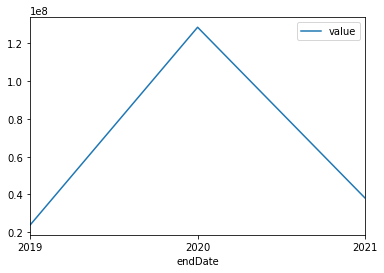

In [350]:
balance.loc[['cash']].melt().set_index('endDate').plot()
plt.show()

In [ ]:
analyst = si.get_analysts_info(ticker)
analyst

In [ ]:
data = si.get_data(ticker)
data['close'].plot()
plt.show()

In [ ]:
ticker = 'tsla'

# Get Cash FLow Data
cash = si.get_cash_flow(ticker)

# Stack the data
cash_stacked = pd.DataFrame()
for idx in cash.index:
    temp = cash.loc[[idx]].melt()
    temp['breakdown'] = idx
    cash_stacked = pd.concat([temp, cash_stacked], ignore_index=True)

# cash_stacked.to_csv('data/wrap_cash.csv', index=False)

market = yf.download(
    ticker, 
    start=cash_stacked['endDate'].min(), 
    end=cash_stacked['endDate'].max(), 
    progress=False
)
# data.to_csv('data/stock_data.csv')
market_change = market[['Adj Close']].reset_index()
market_change['year'] = market_change['Date'].dt.year

# Find the change within the cash reporting periods
adj_close = []
for yr in market_change.year.unique():
    temp = market_change.loc[market_change.year == yr]
    adj_close.append(
        temp.loc[temp.Date == temp.Date.max(), 'Adj Close'].values.item() - \
            temp.loc[temp.Date == temp.Date.min(), 'Adj Close'].values.item()
    )

df = cash_stacked.pivot(index = 'endDate', columns='breakdown', values = 'value')
df['adj_close'] = adj_close
df['date'] = df.index
df.reset_index(drop=True, inplace=True)
df

In [ ]:
df = cash_stacked.pivot(index = 'endDate', columns='breakdown', values = 'value')
df['adj_close'] = adj_close
df['date'] = df.index
df.reset_index(drop=True, inplace=True)
df